In [1]:
import xtrack as xt
import ruamel.yaml
import pickle
import numpy as np
import json
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import SplineTransformer, PolynomialFeatures
import matplotlib.pyplot as plt

# Initialize yaml reader
ryaml = ruamel.yaml.YAML()

In [2]:
collider = xt.Multiline.from_json(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse_new/base_collider/xtrack_0000/collider/collider.json"
)
#collider.build_trackers()

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           


In [9]:
# load dictionnary of elements from pickle
with open(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse_new/base_collider/xtrack_0000/gen_3/dynamic_configure.pkl",
    "rb",
) as fid:
    dic_elements = pickle.load(fid)

In [10]:
l_xrange = []
d_element_attr_vals = { 'lhcb1': {}, 'lhcb2': {}}
for on_sep, d_beam in sorted(dic_elements.items()):
    l_xrange.append(on_sep)
    for beam_temp, d_bb in d_beam.items():
        for type_bb, d_elements in d_bb.items():
            for element, d_attr in d_elements.items():
                if element not in d_element_attr_vals[beam_temp]:
                    d_element_attr_vals[beam_temp][element] = {}

                for attr, val in d_attr.items():
                    if attr in d_element_attr_vals[beam_temp][element]:
                        d_element_attr_vals[beam_temp][element][attr].append(val)
                    else:
                        d_element_attr_vals[beam_temp][element][attr] = [val]

In [5]:
d_element_attr_vals["lhcb1"]["bb_lr.l5b1_25"]["other_beam_shift_y"]

[-0.0005677350205685193,
 -0.00045694885123562874,
 -0.0003436180589060847,
 -0.00023028372199292654,
 -0.00011738095113766584,
 -1.2090632960381148e-05]

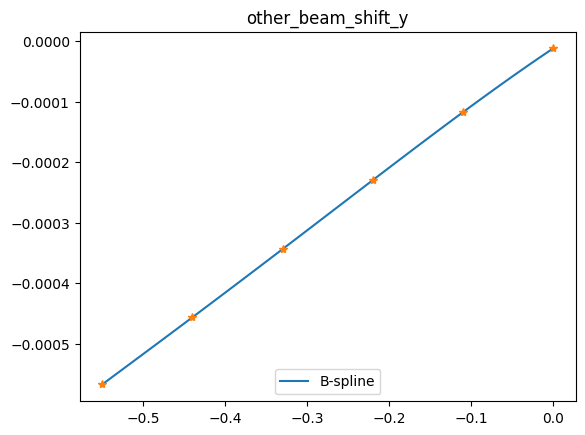

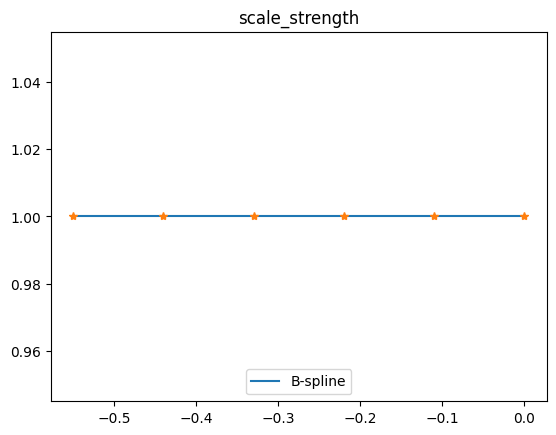

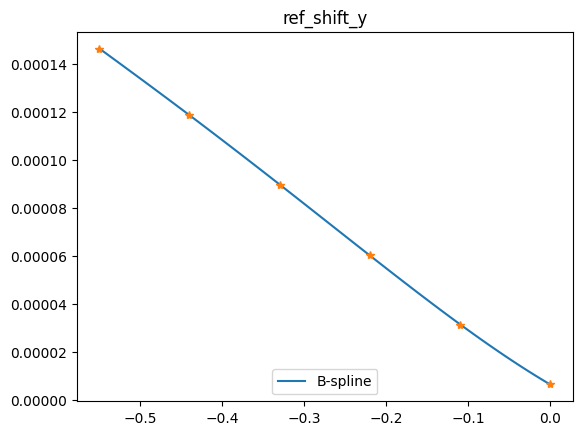

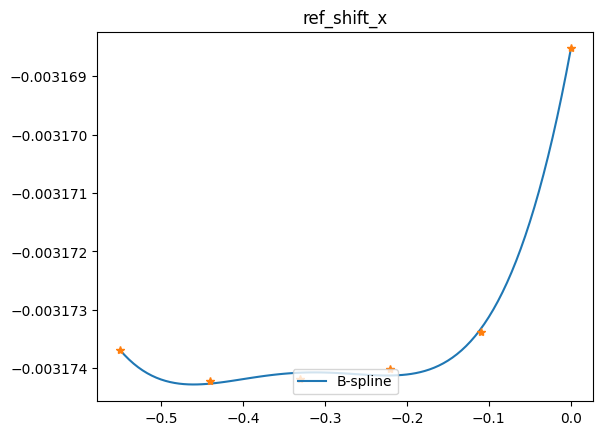

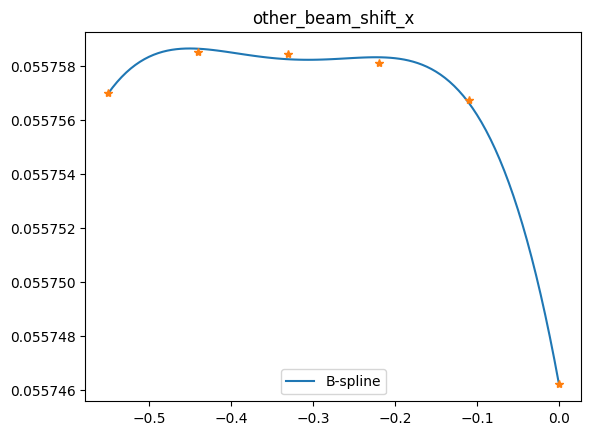

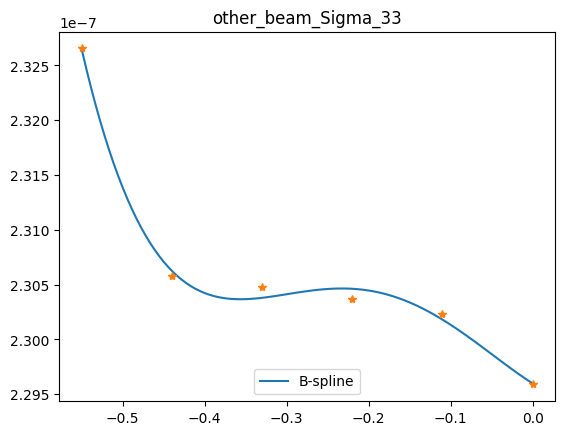

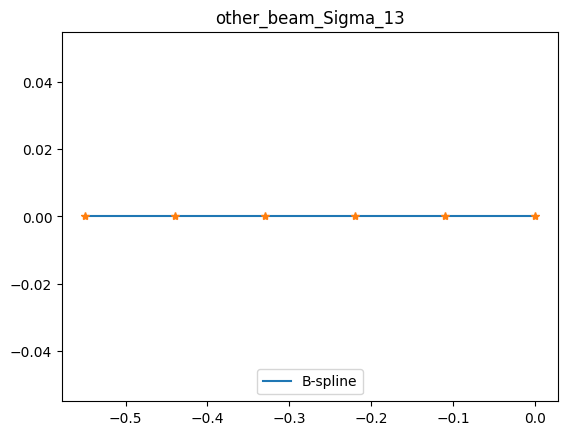

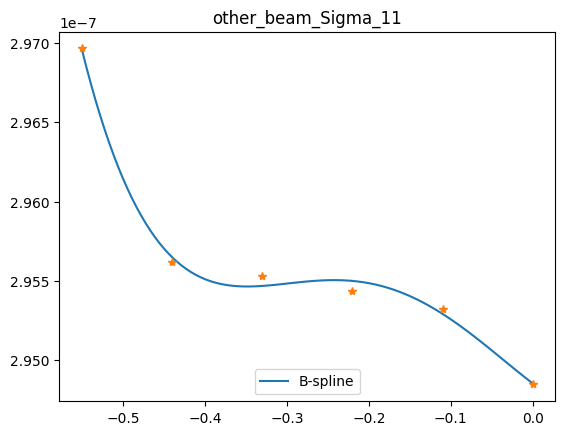

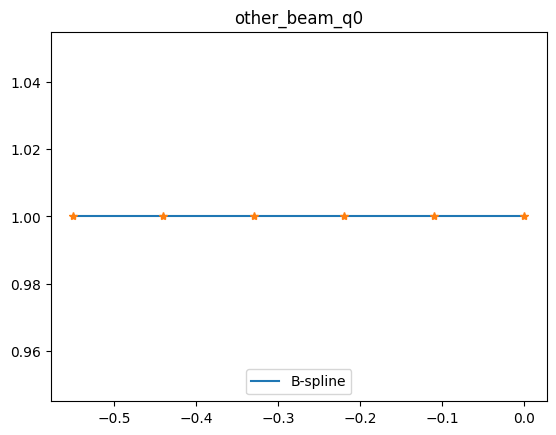

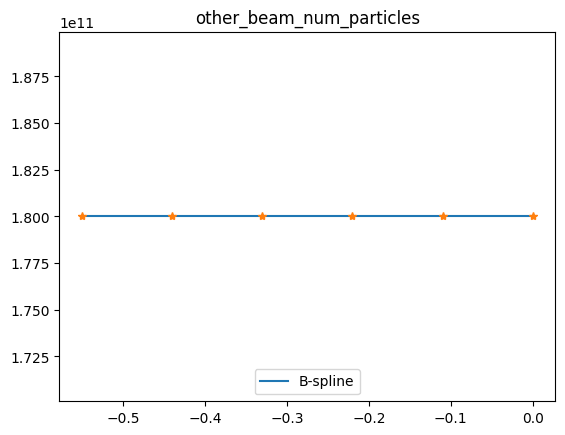

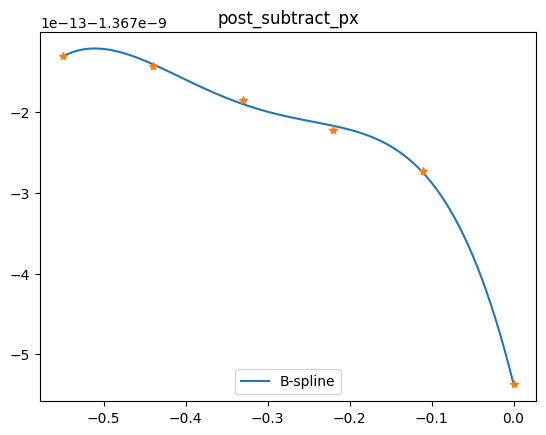

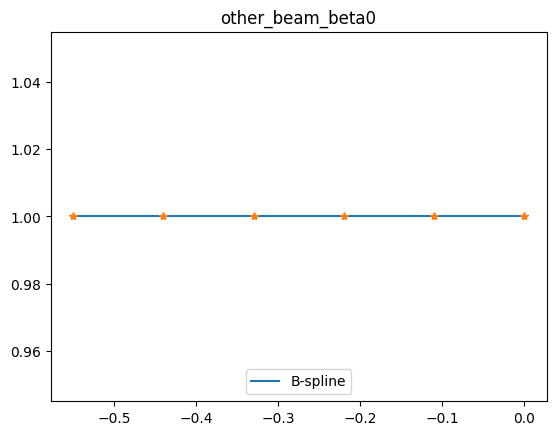

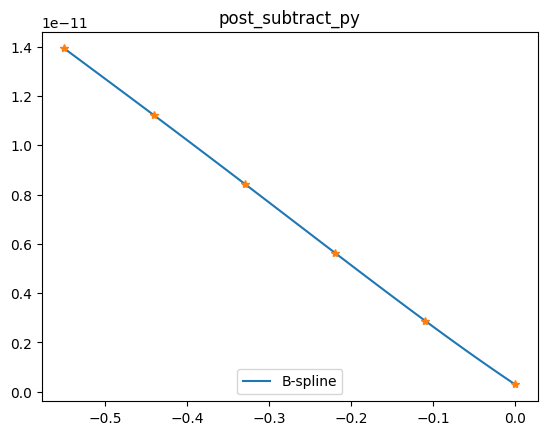

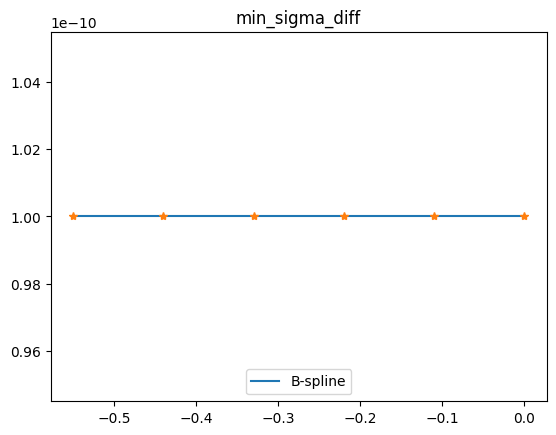

In [6]:
array_xrange = np.array(l_xrange)[:, np.newaxis]
array_xrange_to_plot = np.linspace(l_xrange[0], l_xrange[-1], 100, endpoint = True)[:, np.newaxis]
for attr in d_element_attr_vals["lhcb1"]['bb_lr.l5b1_25']:
    # B-spline with 4 + 3 - 1 = 6 basis functions
    model = make_pipeline(PolynomialFeatures(4), Ridge(alpha=1e-9)) # make_pipeline(SplineTransformer(n_knots=3, degree=5), Ridge(alpha=1e-9))
    model.fit(array_xrange, d_element_attr_vals["lhcb1"]['bb_lr.l5b1_25'][attr])

    fig, ax = plt.subplots()
    y_plot = model.predict(array_xrange_to_plot)
    ax.plot(array_xrange_to_plot, y_plot, label="B-spline")
    ax.plot(l_xrange, d_element_attr_vals["lhcb1"]['bb_lr.l5b1_25'][attr], '*')
    ax.legend(loc="lower center")
    ax.set_title(attr)
    #ax.set_ylim(-20, 10)
    plt.show()

In [10]:
model[:-1].get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [11]:
model[:-1].get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures(degree=4))],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(degree=4),
 'polynomialfeatures__degree': 4,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C'}

In [13]:
model.steps[1][1].intercept_


1e-10

In [14]:
model.steps[1][1].coef_


array([0., 0., 0., 0., 0.])

In [15]:
collider["lhcb1"]['bb_ho.l5b1_01']

BeamBeamBiGaussian3D(scale_strength=1.0, _sin_phi=0.0, _cos_phi=1.0, _tan_phi=0.0, _sin_alpha=0.0, _cos_alpha=1.0, ref_shift_x=0.0, ref_shift_px=0.0, ref_shift_y=0.0, ref_shift_py=0.0, ref_shift_zeta=0.0, ref_shift_pzeta=0.0, other_beam_shift_x=0.0, other_beam_shift_px=0.0, other_beam_shift_y=0.0, other_beam_shift_py=0.0, other_beam_shift_zeta=0.0, other_beam_shift_pzeta=0.0, post_subtract_x=0.0, post_subtract_px=0.0, post_subtract_y=0.0, post_subtract_py=0.0, post_subtract_zeta=0.0, post_subtract_pzeta=0.0, other_beam_q0=0.0, num_slices_other_beam=1, slices_other_beam_num_particles=[0.], slices_other_beam_x_center_star=[0.], slices_other_beam_px_center_star=[0.], slices_other_beam_y_center_star=[0.], slices_other_beam_py_center_star=[0.], slices_other_beam_zeta_center_star=[0.], slices_other_beam_pzeta_center_star=[0.], slices_other_beam_Sigma_11_star=[1.], slices_other_beam_Sigma_12_star=[0.], slices_other_beam_Sigma_13_star=[0.], slices_other_beam_Sigma_14_star=[0.], slices_other_be

In [16]:
model.fit(array_xrange, d_element_attr_vals["lhcb1"]['bb_ho.l5b1_01']["post_subtract_zeta"])
y = model.predict(array_xrange)
y


array([0., 0., 0., 0., 0., 0.])

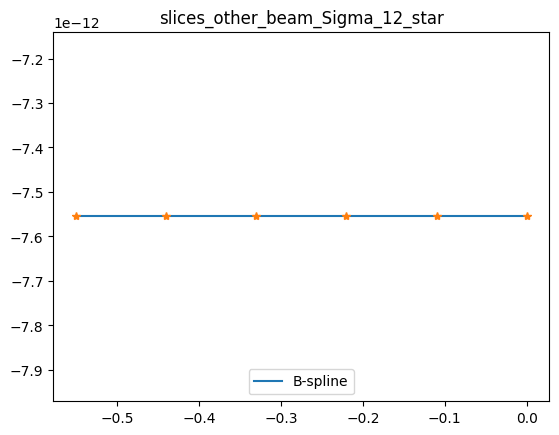

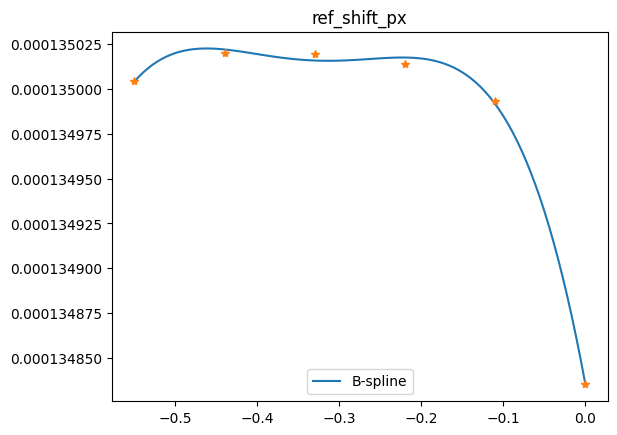

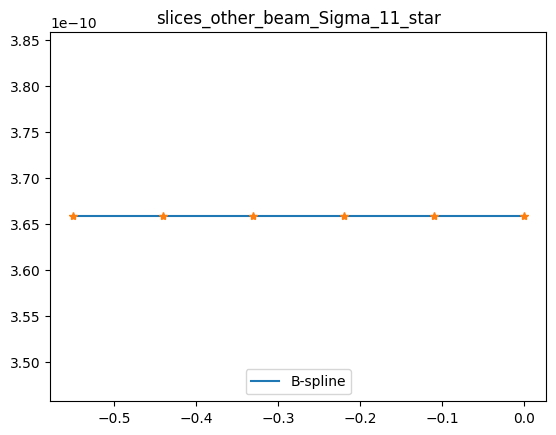

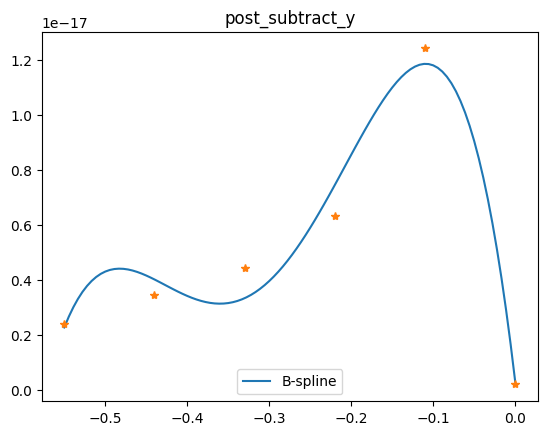

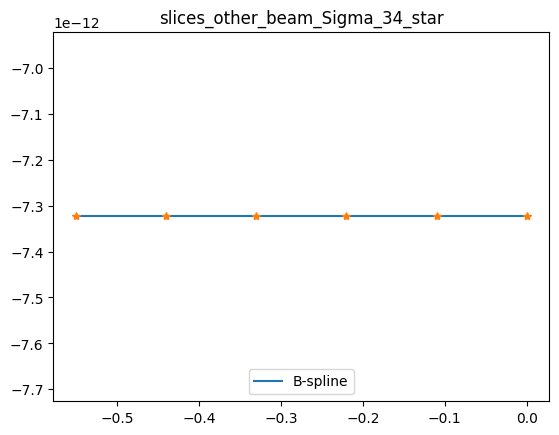

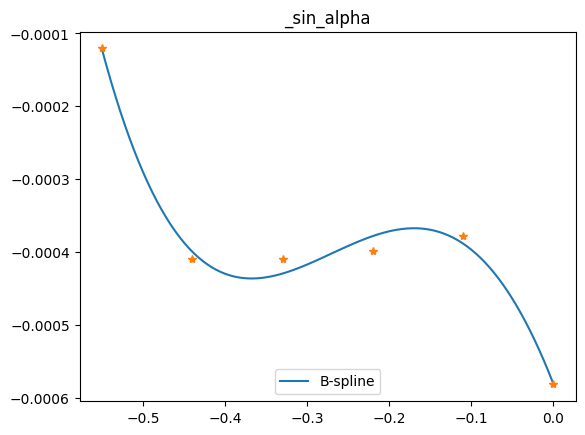

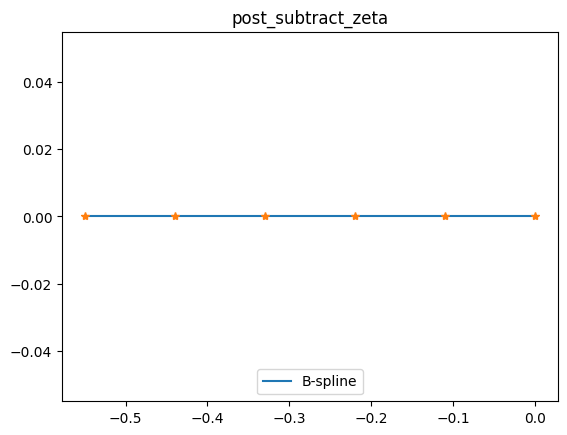

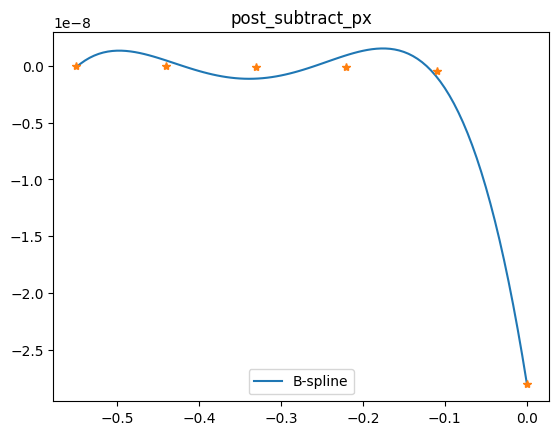

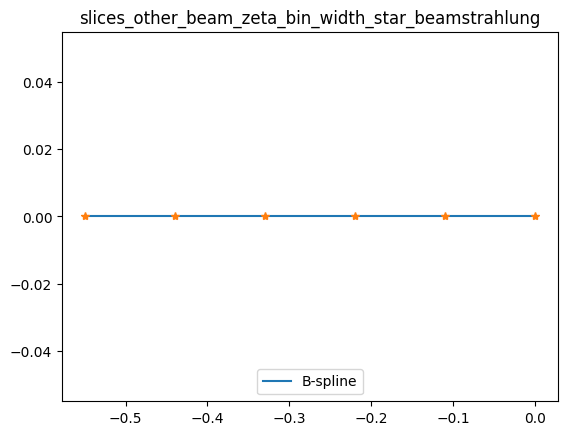

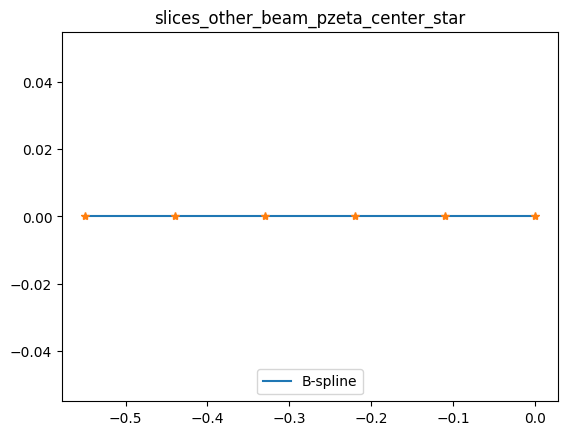

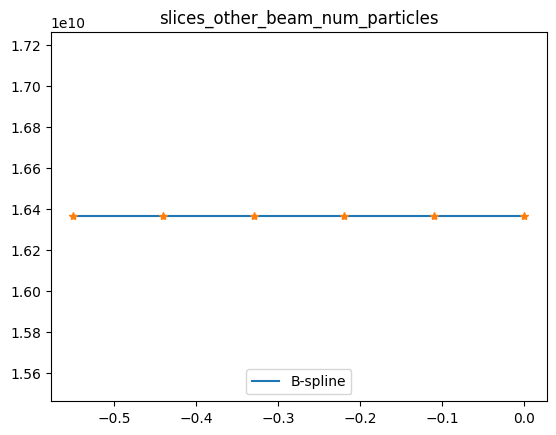

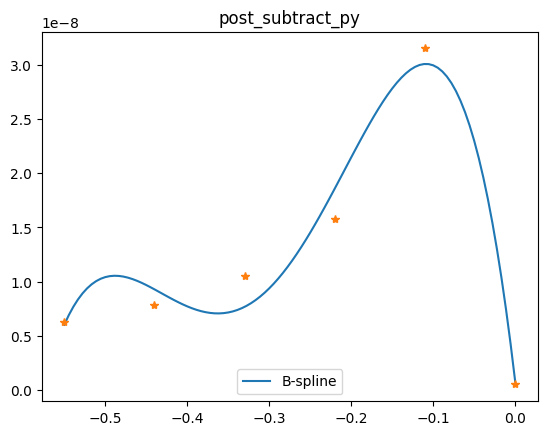

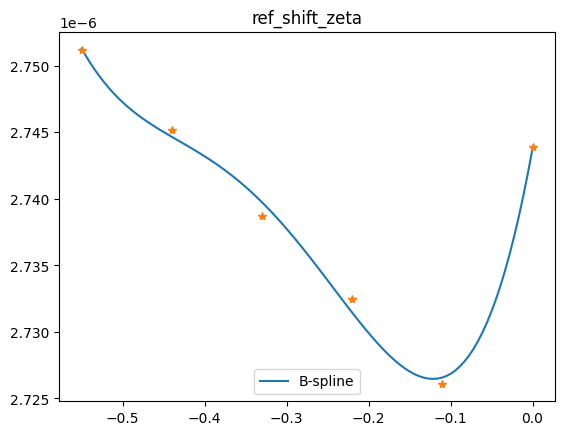

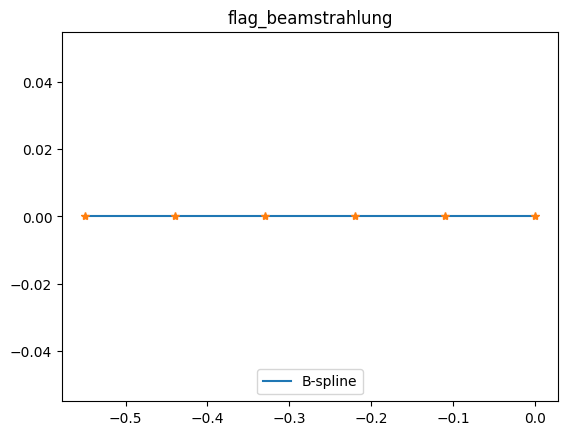

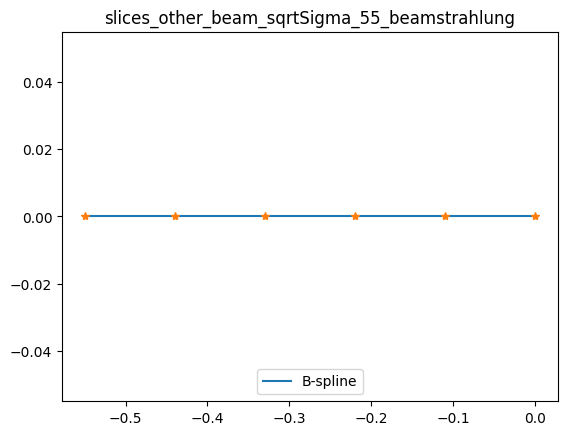

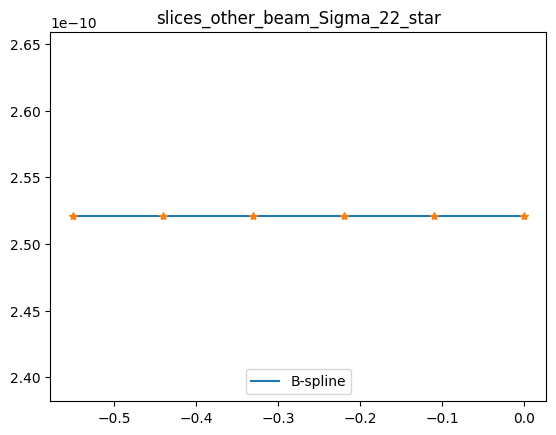

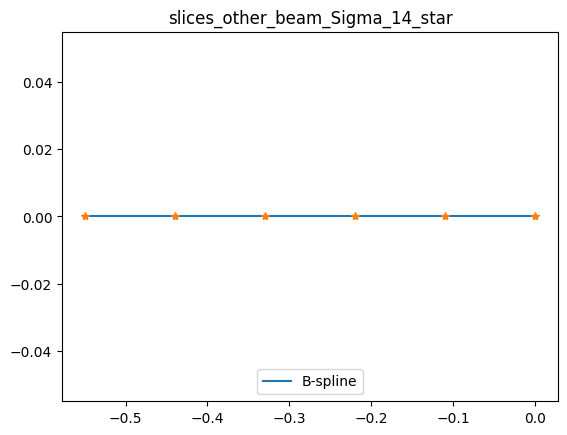

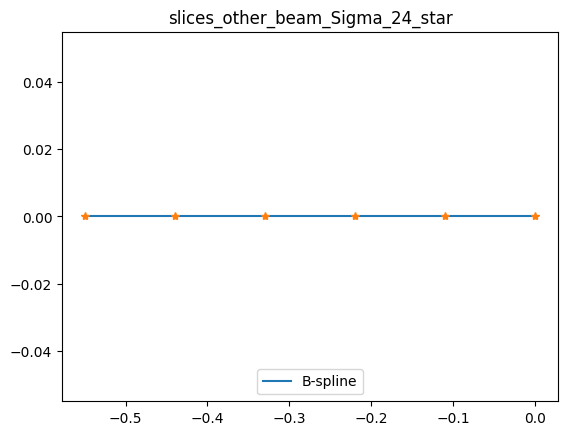

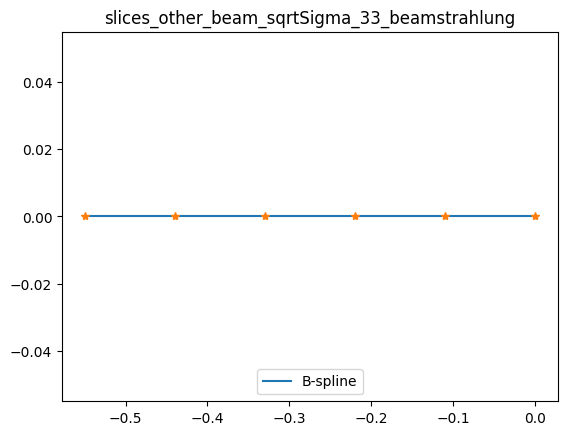

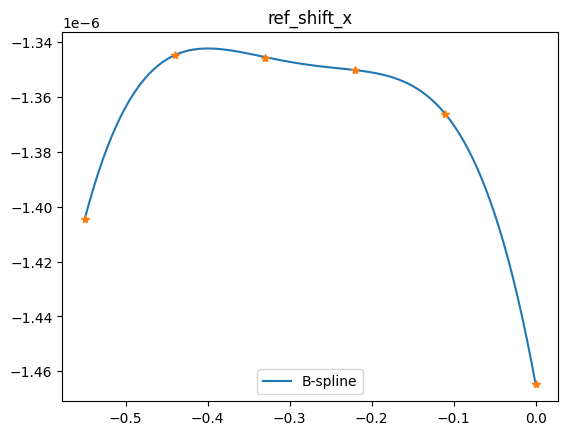

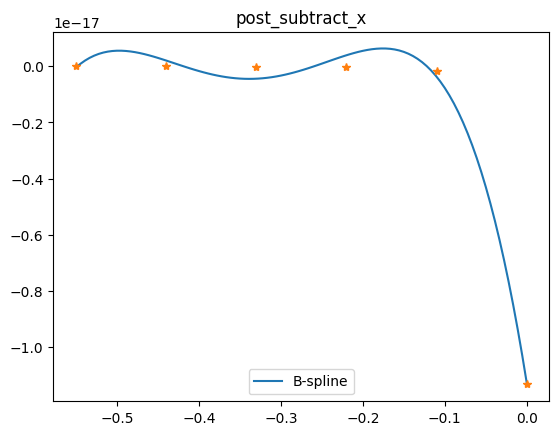

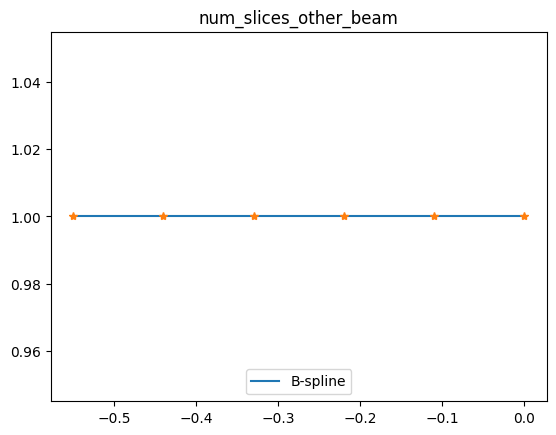

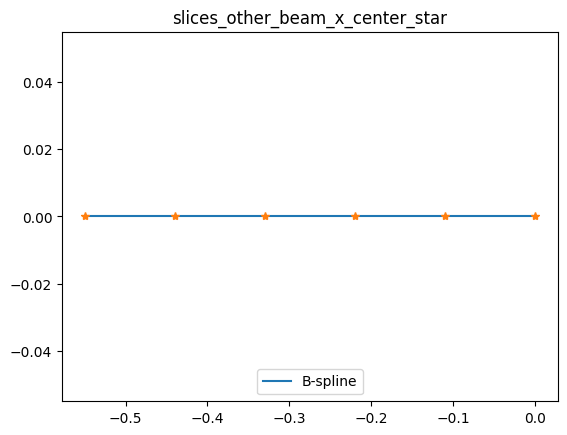

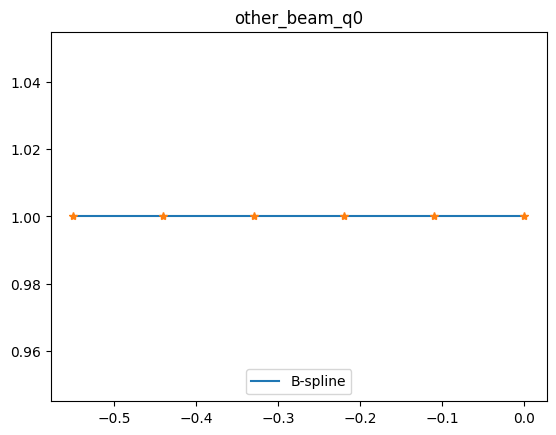

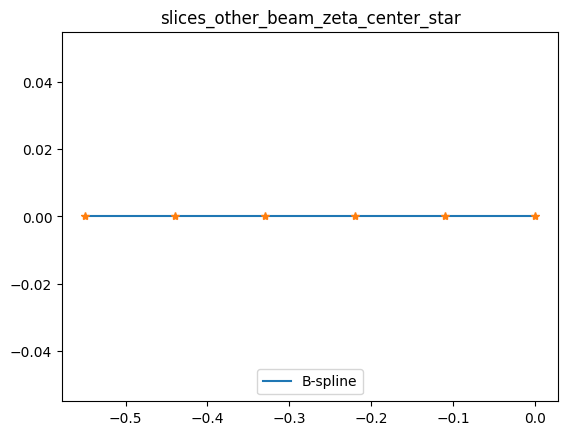

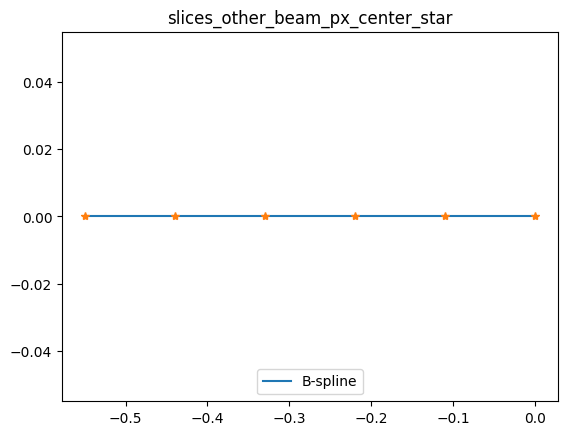

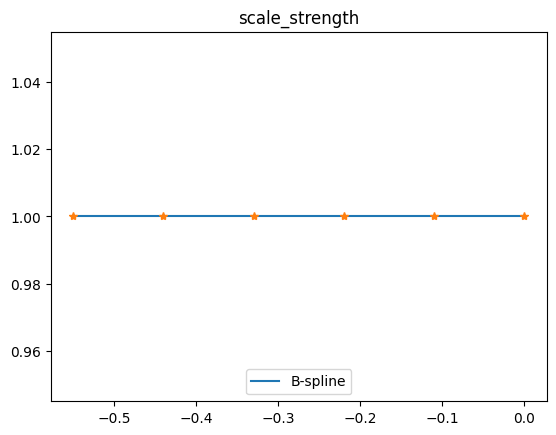

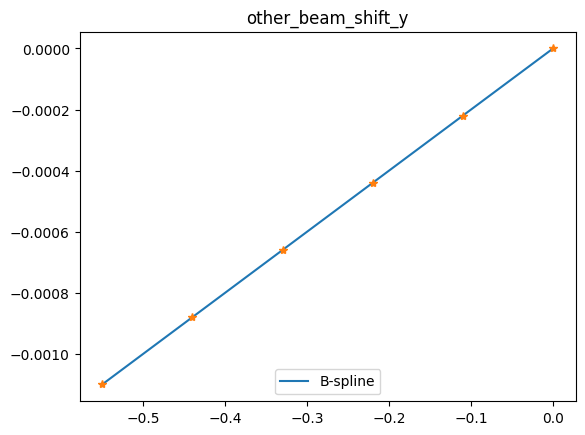

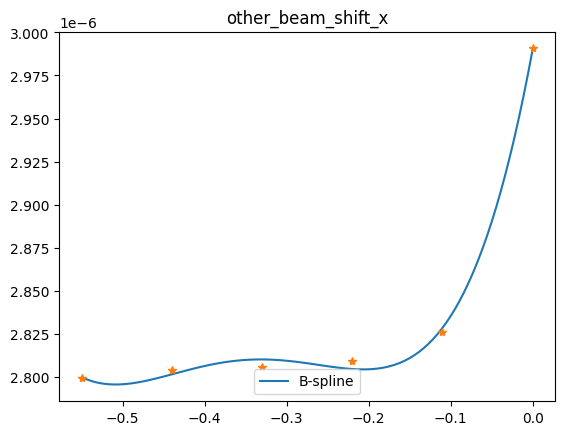

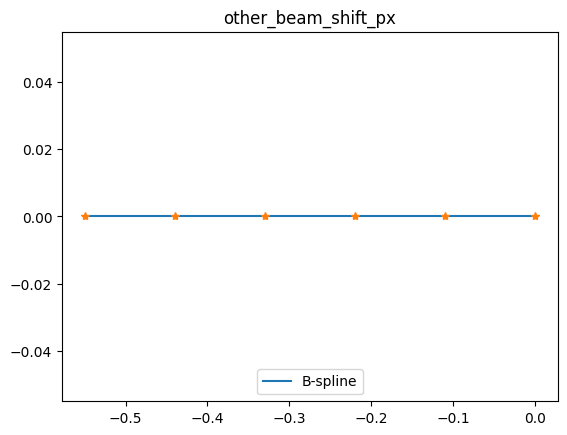

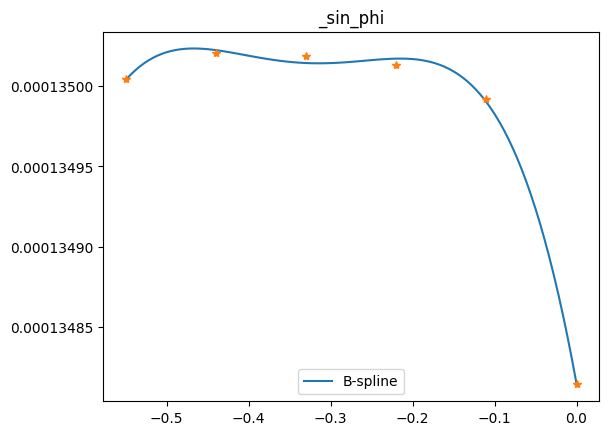

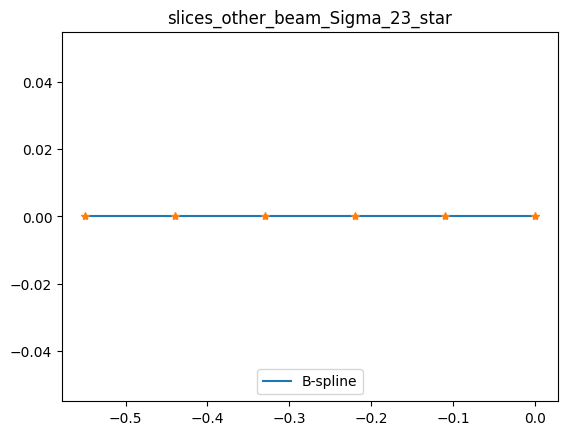

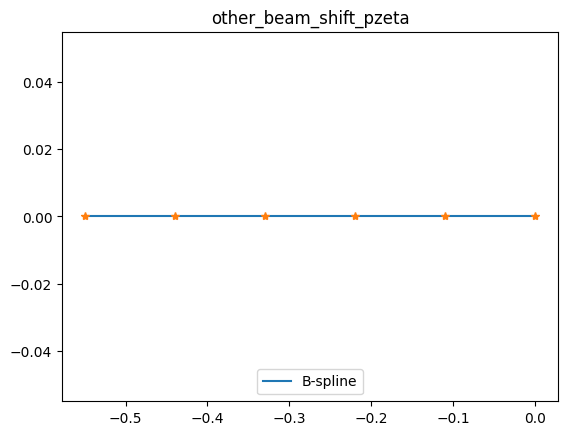

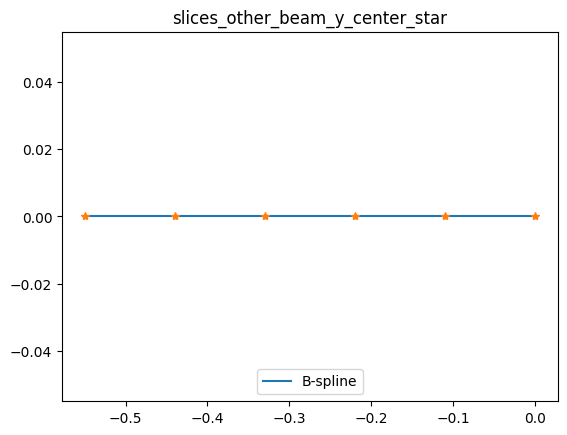

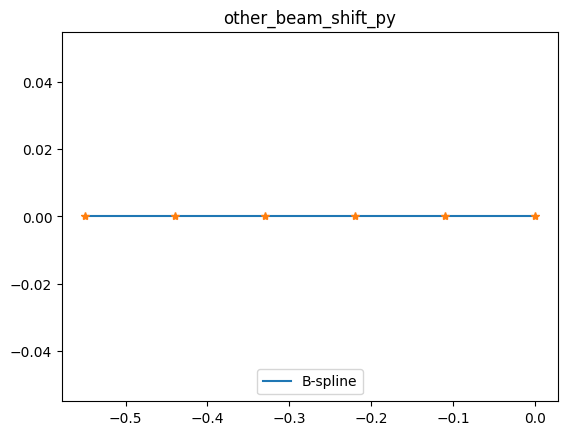

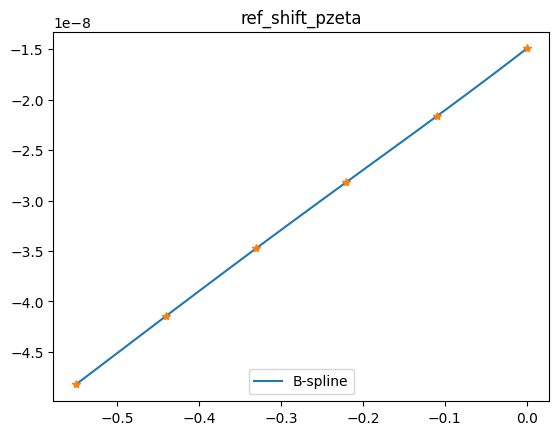

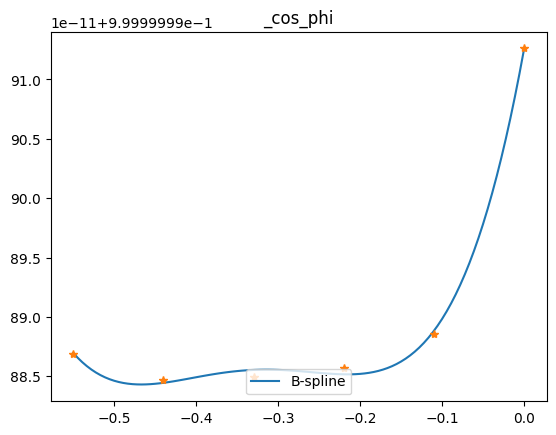

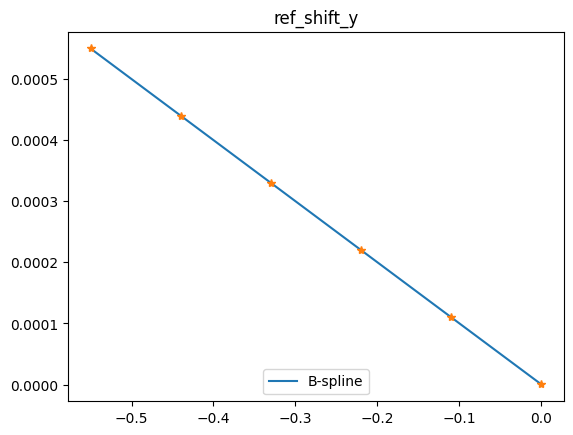

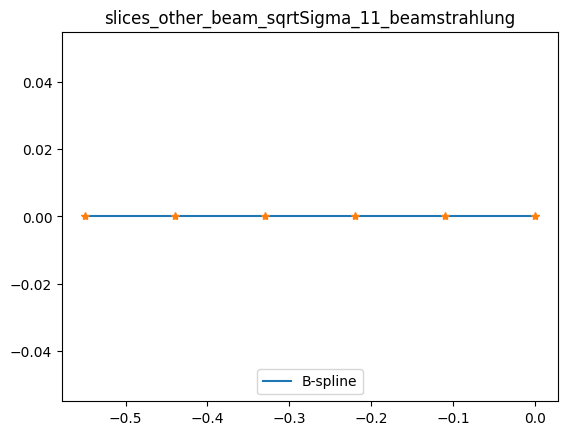

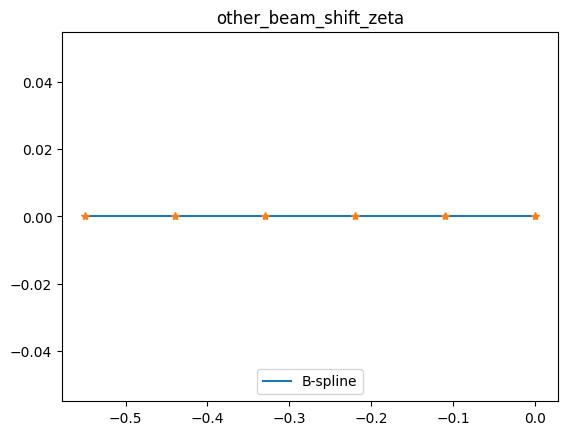

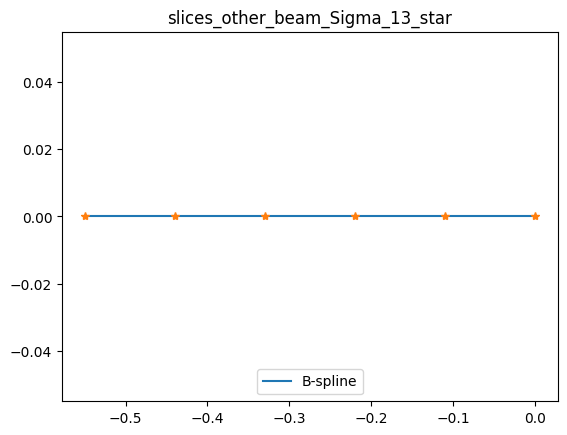

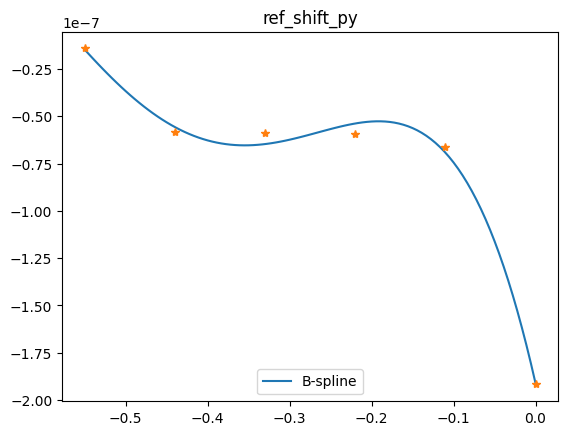

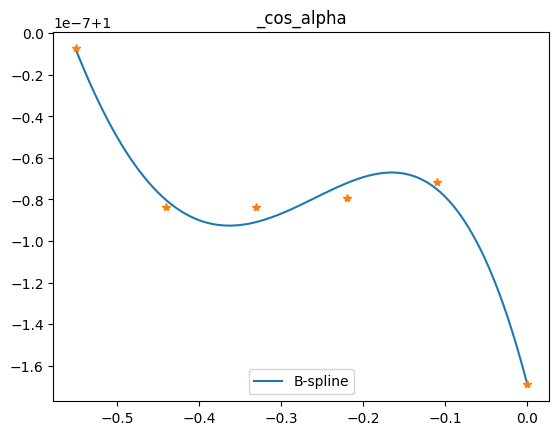

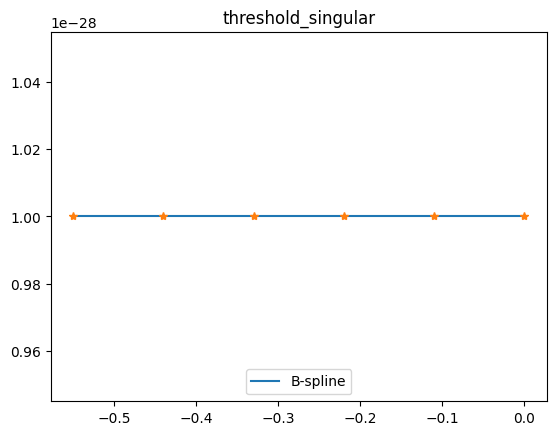

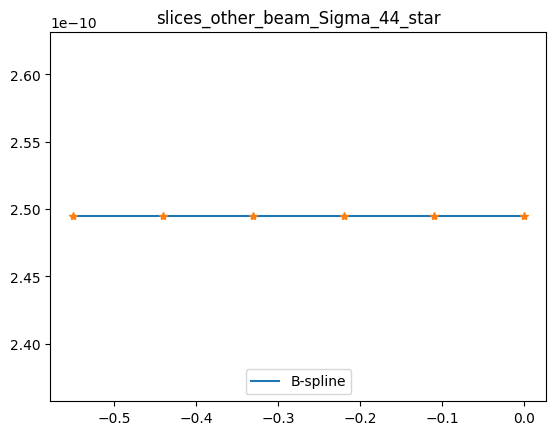

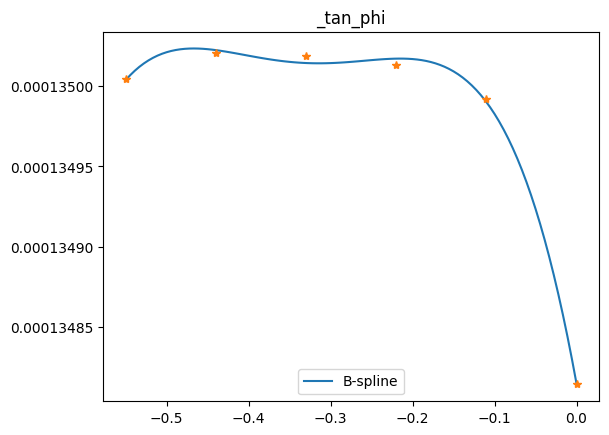

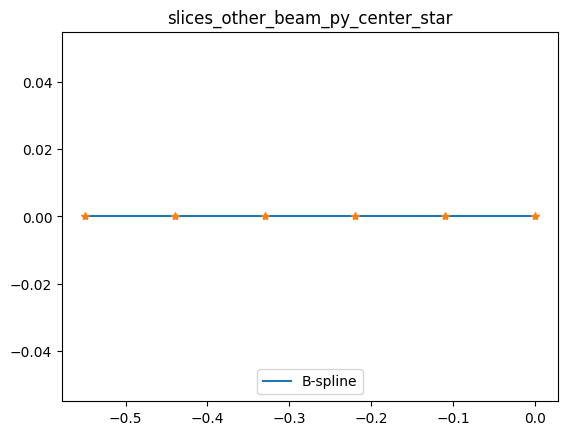

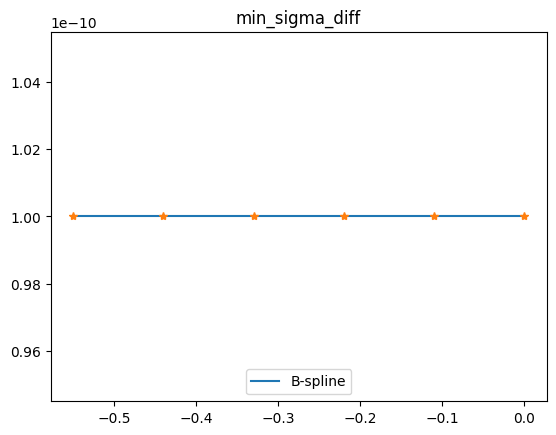

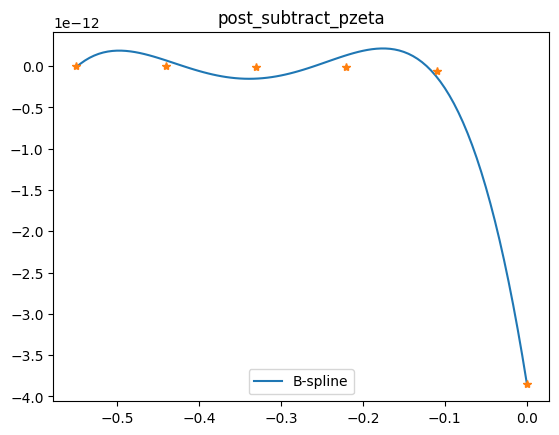

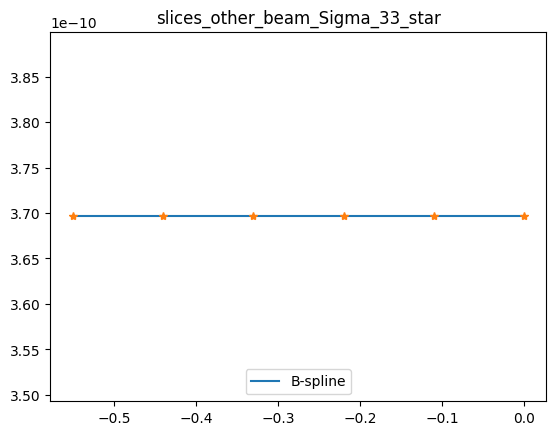

In [40]:
# B-spline with 4 + 3 - 1 = 6 basis functions
array_xrange = np.array(l_xrange)[:, np.newaxis]
array_xrange_to_plot = np.linspace(l_xrange[0], l_xrange[-1], 100, endpoint = True)[:, np.newaxis]
for attr in d_element_attr_vals["lhcb1"]['bb_ho.l5b1_01']:
    

    model = make_pipeline(PolynomialFeatures(4), Ridge(alpha=1e-9)) 
    model.fit(array_xrange, d_element_attr_vals["lhcb1"]['bb_ho.l5b1_01'][attr])

    fig, ax = plt.subplots()
    y_plot = model.predict(array_xrange_to_plot)
    ax.plot(array_xrange_to_plot, y_plot, label="B-spline")
    ax.plot(l_xrange, d_element_attr_vals["lhcb1"]['bb_ho.l5b1_01'][attr], '*')
    ax.legend(loc="lower center")
    ax.set_title(attr)
    #ax.set_ylim(-20, 10)
    plt.show()

In [18]:
model.predict([[-0.5]])[0,0]

3.6961856154584346e-10

In [11]:
import copy
import sklearn

In [12]:
def make_closure(model):
    return lambda x: np.squeeze(model.predict([[x]]))

array_xrange = np.array(l_xrange)[:, np.newaxis]
d_element_attr_regression = {'lhcb1' : {}, 'lhcb2' : {}}
for beam in d_element_attr_regression:
    d_element_attr_regression[beam] = {}
    for element in d_element_attr_vals[beam]:
        d_element_attr_regression[beam][element] = {}
        for attr in d_element_attr_vals[beam][element]:
            d_element_attr_regression[beam][element][attr] = {}
            model = make_pipeline(PolynomialFeatures(4), Ridge(alpha=1e-9)) 
            model.fit(array_xrange, d_element_attr_vals[beam][element][attr])
            d_element_attr_regression[beam][element][attr]['coeffs'] = [model.steps[1][1].intercept_]+list(model.steps[1][1].coef_[1:])
            d_element_attr_regression[beam][element][attr]['fit'] = make_closure(model)
    


In [13]:
# Create knob for beam-beam in collider
for beam in d_element_attr_regression:
    for element in d_element_attr_regression[beam]:
        if 'l1' or 'r1' in element:
            sep = 'on_sep1'
        elif 'l5' or 'r5' in element:
            sep = 'on_sep5'
        else:
            continue
        for attr in d_element_attr_regression[beam][element]:
            l_coef = d_element_attr_regression[beam][element][attr]['coeffs']
            if (
                isinstance(getattr(collider[beam][element], attr), list)
                or isinstance(getattr(collider[beam][element], attr), np.ndarray)
            ):
                setattr(collider[beam].element_refs[element],attr[0], sum([coef * collider.vars[sep]**i for i, coef in enumerate(l_coef)]))
            else:
                setattr(collider[beam].element_refs[element],attr, sum([coef * collider.vars[sep]**i for i, coef in enumerate(l_coef)]))

In [55]:
d_element_attr_regression['lhcb1']["bb_lr.l5b1_25"]["other_beam_shift_y"]['fit'](-0.3)

array(-0.00031291)

In [56]:
sum([coef*(-0.3)**i for i, coef in enumerate(d_element_attr_regression['lhcb1']["bb_lr.l5b1_25"]["other_beam_shift_y"]['coeffs'][:1] + d_element_attr_regression['lhcb1']["bb_lr.l5b1_25"]["other_beam_shift_y"]['coeffs'][2:])])

-0.0003129102083437139

In [50]:
d_element_attr_regression['lhcb1']["bb_lr.l5b1_25"]["other_beam_shift_y"]['coeffs']

[-1.205516797641047e-05,
 0.0,
 0.0009068255592125403,
 -0.0005869659289359956,
 -0.0010873323268849873,
 -0.000659063188295847]

In [23]:
d_element_attr_regression['lhcb1']["bb_lr.l5b1_25"]["min_sigma_diff"]['fit'](-0.3)

array(1.e-10)

In [24]:
collider.lhcb1["bb_lr.l5b1_25"].min_sigma_diff

1e-10

Now make a dynamic knob for each BB attribute

In [25]:
collider.lhcb1.element_refs["bb_lr.l5b1_25"].min_sigma_diff = collider.vars['on_sep5'] + collider.vars['on_sep1']**2 + collider.vars['on_sep1']**3

In [26]:
collider.lhcb1.element_refs["bb_lr.l5b1_25"].min_sigma_diff._info()

#  eref['lhcb1']['bb_lr.l5b1_25'].min_sigma_diff._get_value()
   eref['lhcb1']['bb_lr.l5b1_25'].min_sigma_diff = 0.686125

#  eref['lhcb1']['bb_lr.l5b1_25'].min_sigma_diff._expr
   eref['lhcb1']['bb_lr.l5b1_25'].min_sigma_diff = ((vars['on_sep5']+(vars['on_sep1']**2))+(vars['on_sep1']**3))

#  eref['lhcb1']['bb_lr.l5b1_25'].min_sigma_diff._expr._get_dependencies()
   vars['on_sep1'] = -0.55
   vars['on_sep5'] = 0.55

#  eref['lhcb1']['bb_lr.l5b1_25'].min_sigma_diff does not influence any target



In [16]:
collider.discard_trackers()

In [9]:
collider.build_trackers()

Compiling ContextCpu kernels...


d2303b66fe584ad4951da7d5095c9def.c:5035: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from d2303b66fe584ad4951da7d5095c9def.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 
d2303b66fe584ad4951da7d5095c9def.c: In function ‘compt_do’:
d2303b66fe584ad4951da7d5095c9def.c:18160:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^~~~~~~~~~~~~~~~~~
d2303b66fe584ad4951da7d5095c9def.c:18157:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                              ^~~~~~~~~~
d2303b

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


30192192d9e6490f925a765ef83ad4bd.c:5035: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 30192192d9e6490f925a765ef83ad4bd.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 
30192192d9e6490f925a765ef83ad4bd.c: In function ‘compt_do’:
30192192d9e6490f925a765ef83ad4bd.c:18160:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^~~~~~~~~~~~~~~~~~
30192192d9e6490f925a765ef83ad4bd.c:18157:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                              ^~~~~~~~~~
301921

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [62]:
collider.lhcb1.element_refs["bb_lr.l5b1_25"].other_beam_shift_y._info()

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y._get_value()
   eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y = -2.502089056154609e-06

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y._expr
   eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y = ((((((0+(-1.205516797641047e-05*(vars['on_sep1']**0)))+(0.0*(vars['on_sep1']**1)))+(0.0009068255592125403*(vars['on_sep1']**2)))+(-0.0005869659289359956*(vars['on_sep1']**3)))+(-0.0010873323268849873*(vars['on_sep1']**4)))+(-0.000659063188295847*(vars['on_sep1']**5)))

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y._expr._get_dependencies()
   vars['on_sep1'] = -0.1

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y does not influence any target



In [19]:
collider.vars['on_sep1']._value

-0.55

In [20]:
collider.lhcb1.element_refs["bb_lr.l5b1_25"].other_beam_shift_y._info()

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y._get_value()
   eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y = -0.0005677373178011407

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y._expr
   eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y = (((((0+(-1.205516797641047e-05*(vars['on_sep1']**0)))+(0.0009068255592125403*(vars['on_sep1']**1)))+(-0.0005869659289359956*(vars['on_sep1']**2)))+(-0.0010873323268849873*(vars['on_sep1']**3)))+(-0.000659063188295847*(vars['on_sep1']**4)))

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y._expr._get_dependencies()
   vars['on_sep1'] = -0.55

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y does not influence any target



In [64]:
collider.lhcb1.element_refs["bb_lr.l5b1_25"].other_beam_shift_y._info()

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y._get_value()
   eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y = 7.820134413378055e-05

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y._expr
   eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y = ((((((0+(-1.205516797641047e-05*(vars['on_sep1']**0)))+(0.0*(vars['on_sep1']**1)))+(0.0009068255592125403*(vars['on_sep1']**2)))+(-0.0005869659289359956*(vars['on_sep1']**3)))+(-0.0010873323268849873*(vars['on_sep1']**4)))+(-0.000659063188295847*(vars['on_sep1']**5)))

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y._expr._get_dependencies()
   vars['on_sep1'] = -0.3

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_y does not influence any target



In [4]:
def configure_beam_beam(collider, config_bb):
    collider.configure_beambeam_interactions(
        num_particles=config_bb["num_particles_per_bunch"],
        nemitt_x=config_bb["nemitt_x"],
        nemitt_y=config_bb["nemitt_y"],
    )

    # Configure filling scheme mask and bunch numbers
    if "mask_with_filling_pattern" in config_bb:
        # Initialize filling pattern with empty values
        filling_pattern_cw = None
        filling_pattern_acw = None

        # Initialize bunch numbers with empty values
        i_bunch_cw = None
        i_bunch_acw = None

        if "pattern_fname" in config_bb["mask_with_filling_pattern"]:
            # Fill values if possible
            if config_bb["mask_with_filling_pattern"]["pattern_fname"] is not None:
                fname = "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/master_jobs/filling_scheme/25ns_2464b_2452_1842_1821_236bpi_12inj_hybrid_converted.json"  # config_bb["mask_with_filling_pattern"]["pattern_fname"]
                with open(fname, "r") as fid:
                    filling = json.load(fid)
                filling_pattern_cw = filling["beam1"]
                filling_pattern_acw = filling["beam2"]

                # Only track bunch number if a filling pattern has been provided
                if "i_bunch_b1" in config_bb["mask_with_filling_pattern"]:
                    i_bunch_cw = 411
                if "i_bunch_b2" in config_bb["mask_with_filling_pattern"]:
                    i_bunch_acw = 410

                # Note that a bunch number must be provided if a filling pattern is provided
                # Apply filling pattern
                collider.apply_filling_pattern(
                    filling_pattern_cw=filling_pattern_cw,
                    filling_pattern_acw=filling_pattern_acw,
                    i_bunch_cw=i_bunch_cw,
                    i_bunch_acw=i_bunch_acw,
                )

    return collider


# Read configuration for simulations
with open(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse_new/base_collider/xtrack_0000/gen_3/gen_4/gen_5/config.yaml",
    "r",
) as fid:
    config = ryaml.load(fid)

config_bb = config["config_collider"]["config_beambeam"]
collider = configure_beam_beam(collider, config_bb)

Compiling ContextCpu kernels...


ff8ba02f90ab49cdb5efedc264487072.c:5035: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from ff8ba02f90ab49cdb5efedc264487072.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 
ff8ba02f90ab49cdb5efedc264487072.c: In function ‘compt_do’:
ff8ba02f90ab49cdb5efedc264487072.c:18160:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^~~~~~~~~~~~~~~~~~
ff8ba02f90ab49cdb5efedc264487072.c:18157:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                              ^~~~~~~~~~
ff8ba0

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


65f73f4244534aa180f5c66d55471ae2.c:5040: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 65f73f4244534aa180f5c66d55471ae2.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 
65f73f4244534aa180f5c66d55471ae2.c: In function ‘compt_do’:
65f73f4244534aa180f5c66d55471ae2.c:18165:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^~~~~~~~~~~~~~~~~~
65f73f4244534aa180f5c66d55471ae2.c:18162:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                              ^~~~~~~~~~
65f73f

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


b2afea3b1c6e4892bce0e5408b3d1ed0.c:5035: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from b2afea3b1c6e4892bce0e5408b3d1ed0.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 
b2afea3b1c6e4892bce0e5408b3d1ed0.c: In function ‘compt_do’:
b2afea3b1c6e4892bce0e5408b3d1ed0.c:18160:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^~~~~~~~~~~~~~~~~~
b2afea3b1c6e4892bce0e5408b3d1ed0.c:18157:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                              ^~~~~~~~~~
b2afea

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


55115839b3fe4219bc2837d46fba3c39.c:5040: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 55115839b3fe4219bc2837d46fba3c39.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 
55115839b3fe4219bc2837d46fba3c39.c: In function ‘compt_do’:
55115839b3fe4219bc2837d46fba3c39.c:18165:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^~~~~~~~~~~~~~~~~~
55115839b3fe4219bc2837d46fba3c39.c:18162:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                              ^~~~~~~~~~
551158

Done compiling ContextCpu kernels.
bb_lr.l1b1_17 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_18 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_19 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_20 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_21 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_22 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_23 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_24 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_25 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l5b1_17 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l5b1_18 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l5b1_19 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l5b1_20 Ref

73ddbc1bd2bf45e1a5c0729f97cf2fb2.c:3702: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 73ddbc1bd2bf45e1a5c0729f97cf2fb2.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


d6495649369d4566b1255129a4a6949f.c:7252: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from d6495649369d4566b1255129a4a6949f.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 
d6495649369d4566b1255129a4a6949f.c: In function ‘compt_do’:
d6495649369d4566b1255129a4a6949f.c:10637:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^~~~~~~~~~~~~~~~~~
d6495649369d4566b1255129a4a6949f.c:10634:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                              ^~~~~~~~~~
d64956

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [16]:
collider.vars['on_sep1'] = -0.3
collider.vars['on_sep5'] = -0.3

In [14]:
collider.vars['on_sep1']._info()

#  vars['on_sep1']._get_value()
   vars['on_sep1'] = 0.0

#  vars['on_sep1']._expr is None

#  vars['on_sep1']._find_dependant_targets()
   eref['lhcb2']['bb_ho.l5b2_05'].post_subtract_pzeta
   eref['lhcb2']['bb_ho.l5b2_05'].min_sigma_diff
   eref['lhcb2']['bb_ho.l5b2_05']._tan_phi
   eref['lhcb2']['bb_ho.l5b2_05'].threshold_singular
   eref['lhcb2']['bb_ho.l5b2_05']._cos_alpha
   eref['lhcb2']['bb_ho.l5b2_05'].ref_shift_py
   eref['lhcb2']['bb_ho.l5b2_05'].other_beam_shift_zeta
   eref['lhcb2']['bb_ho.l5b2_05'].ref_shift_y
   eref['lhcb2']['bb_ho.l5b2_05']._cos_phi
   eref['lhcb2']['bb_ho.l5b2_05'].ref_shift_pzeta
   ... set _info(limit=None) to get all lines



Tracking particles for footprint...
Done tracking.
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Done computing footprint.


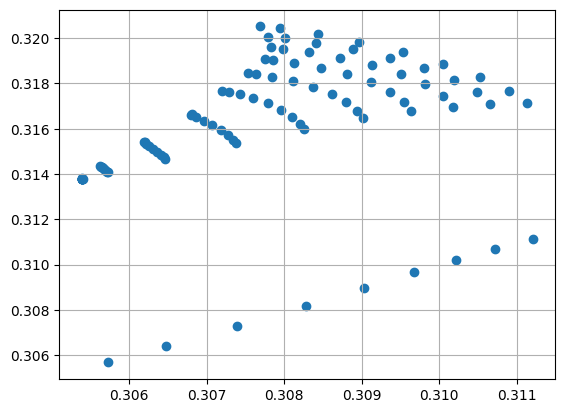

In [17]:
# Function to compute footprint
def return_footprint(collider, emittance, beam="lhcb1", n_turns=2000):
    fp_polar_xm = collider[beam].get_footprint(
        nemitt_x=emittance,
        nemitt_y=emittance,
        n_turns=n_turns,
        linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.05)],
        freeze_longitudinal=True,
    )

    qx = fp_polar_xm.qx
    qy = fp_polar_xm.qy

    return qx, qy

qx, qy = return_footprint(collider, 2e-6, beam="lhcb1", n_turns=500)
plt.scatter(qx, qy)
plt.grid()
plt.show()
